# Phase 3 Project by $Mercy$

## Business Understanding
SyriaTel is a telecommunications company in Syria. They have been informed that some of their customers have started to churn, discontinue their service.

### Objectives
i. Find features that cuase customers to opt for churning

ii. Predict the likely churning for future customers

## Data Understanding

**Summary of Features in the Datset**

* **state:** the state the customer lives in

* **account length**: the number of days the customer has had an account

* **area code**: the area code of the customer

* **phone number**: the phone number of the customer

* **international plan**: true if the customer has the international plan, otherwise false

* **voice mail plan**: true if the customer has the voice mail plan, otherwise false

* **number vmail messages**: the number of voicemails the customer has sent

* **total day minutes**: total number of minutes the customer has been in calls during the day

* **total day calls**: total number of calls the user has done during the day

* **total day charge**: total amount of money the customer was charged by the Telecom company for calls during the day

* **total eve minutes**: total number of minutes the customer has been in calls during the evening

* **total eve calls**: total number of calls the customer has done during the evening

* **total eve charge**: total amount of money the customer was charged by the Telecom company for calls during the evening

* **total night minutes**: total number of minutes the customer has been in calls during the night

* **total night calls**: total number of calls the customer has done during the night

* **total night charge**: total amount of money the customer was charged by the Telecom company for calls during the night

* **total intl minutes**: total number of minutes the user has been in international calls

* **total intl calls**: total number of international calls the customer has done

* **total intl charge**: total amount of money the customer was charged by the Telecom company for international calls

* **customer service calls**: number of calls the customer has made to customer service

* **churn**: true if the customer terminated their contract, otherwise false

In [86]:
# Import the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Preprocessing Libraries and other libraries
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler 
from sklearn.metrics import accuracy_score, roc_curve, roc_auc_score
from imblearn.over_sampling import SMOTE

# Algorithms used for supervised learning methods
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier

In [57]:
# Read in CSV file
SyriaTel_df = pd.read_csv("SyriaTel Customer Churn.csv")

# Check the top 5 records
SyriaTel_df.head()

state  account length  area code phone number international plan  \
0    KS             128        415     382-4657                 no   
1    OH             107        415     371-7191                 no   
2    NJ             137        415     358-1921                 no   
3    OH              84        408     375-9999                yes   
4    OK              75        415     330-6626                yes   

  voice mail plan  number vmail messages  total day minutes  total day calls  \
0             yes                     25              265.1              110   
1             yes                     26              161.6              123   
2              no                      0              243.4              114   
3              no                      0              299.4               71   
4              no                      0              166.7              113   

   total day charge  ...  total eve calls  total eve charge  \
0             45.07  ...               99             16.78   
1             27.47  ...              103             16.62   
2             41.38  ...              110             10.30   
3             50.90  ...               88              5.26   
4             28.34  ...              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False  

[5 rows x 21 columns]

In [58]:
# Check shape of dataframe - 3333 rows and 21 columns
SyriaTel_df.shape

(3333, 21)

In [59]:
SyriaTel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

The Dataset has 21 columns, 3333 records/rows with no null values.

It has data of type float, int, bool and object

## Data Preparation

This section prepares the data for EDA and modeling. The dataset will be checked for:

    duplicated rows
    missing values
    irrelevant columns as they may not add to the analysis

Check for duplicates

In [60]:
#Checking for duplicates
SyriaTel_df.duplicated().sum() # No duplicate values

0

Check for missing values

In [61]:
SyriaTel_df.isnull().sum()

state                     0
account length            0
area code                 0
phone number              0
international plan        0
voice mail plan           0
number vmail messages     0
total day minutes         0
total day calls           0
total day charge          0
total eve minutes         0
total eve calls           0
total eve charge          0
total night minutes       0
total night calls         0
total night charge        0
total intl minutes        0
total intl calls          0
total intl charge         0
customer service calls    0
churn                     0
dtype: int64

Remove the unimportant columns

In [62]:
# Remove 'phone number' feature it is a contact information of the client and it adds no value to the analysis
SyriaTel_df.drop(['phone number'],axis=1,inplace=True)

# Recheck dataframe
SyriaTel_df.head()

state  account length  area code international plan voice mail plan  \
0    KS             128        415                 no             yes   
1    OH             107        415                 no             yes   
2    NJ             137        415                 no              no   
3    OH              84        408                yes              no   
4    OK              75        415                yes              no   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   
2                      0              243.4              114   
3                      0              299.4               71   
4                      0              166.7              113   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   
2             41.38              121.2              110             10.30   
3             50.90               61.9               88              5.26   
4             28.34              148.3              122             12.61   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   
2                162.6                104                7.32   
3                196.9                 89                8.86   
4                186.9                121                8.41   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3               2.70   
1                13.7                 3               3.70   
2                12.2                 5               3.29   
3                 6.6                 7               1.78   
4                10.1                 3               2.73   

   customer service calls  churn  
0                       1  False  
1                       1  False  
2                       0  False  
3                       2  False  
4                       3  False

Let us check if there are outliers

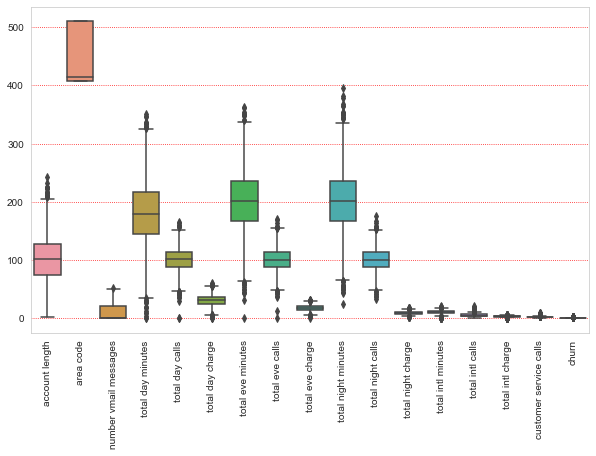

In [63]:
# Check for outliers.
plt.figure(figsize=(10,6))
sns.boxplot(data=SyriaTel_df)
plt.xticks(rotation=90)
plt.show()

In [64]:

SyriaTel_df.describe()

account length    area code  number vmail messages  total day minutes  \
count     3333.000000  3333.000000            3333.000000        3333.000000   
mean       101.064806   437.182418               8.099010         179.775098   
std         39.822106    42.371290              13.688365          54.467389   
min          1.000000   408.000000               0.000000           0.000000   
25%         74.000000   408.000000               0.000000         143.700000   
50%        101.000000   415.000000               0.000000         179.400000   
75%        127.000000   510.000000              20.000000         216.400000   
max        243.000000   510.000000              51.000000         350.800000   

       total day calls  total day charge  total eve minutes  total eve calls  \
count      3333.000000       3333.000000        3333.000000      3333.000000   
mean        100.435644         30.562307         200.980348       100.114311   
std          20.069084          9.259435          50.713844        19.922625   
min           0.000000          0.000000           0.000000         0.000000   
25%          87.000000         24.430000         166.600000        87.000000   
50%         101.000000         30.500000         201.400000       100.000000   
75%         114.000000         36.790000         235.300000       114.000000   
max         165.000000         59.640000         363.700000       170.000000   

       total eve charge  total night minutes  total night calls  \
count       3333.000000          3333.000000        3333.000000   
mean          17.083540           200.872037         100.107711   
std            4.310668            50.573847          19.568609   
min            0.000000            23.200000          33.000000   
25%           14.160000           167.000000          87.000000   
50%           17.120000           201.200000         100.000000   
75%           20.000000           235.300000         113.000000   
max           30.910000           395.000000         175.000000   

       total night charge  total intl minutes  total intl calls  \
count         3333.000000         3333.000000       3333.000000   
mean             9.039325           10.237294          4.479448   
std              2.275873            2.791840          2.461214   
min              1.040000            0.000000          0.000000   
25%              7.520000            8.500000          3.000000   
50%              9.050000           10.300000          4.000000   
75%             10.590000           12.100000          6.000000   
max             17.770000           20.000000         20.000000   

       total intl charge  customer service calls  
count        3333.000000             3333.000000  
mean            2.764581                1.562856  
std             0.753773                1.315491  
min             0.000000                0.000000  
25%             2.300000                1.000000  
50%             2.780000                1.000000  
75%             3.270000                2.000000  
max             5.400000                9.000000

## EDA (Eploratory Data Analysis)
Here we explore the dataset and see what it has. We will check the datatypes, the relationship, etc.


Check Categorical features and Continuos features

In [65]:
# SyriaTel_df.info()
SyriaTel_df.head(2)

state  account length  area code international plan voice mail plan  \
0    KS             128        415                 no             yes   
1    OH             107        415                 no             yes   

   number vmail messages  total day minutes  total day calls  \
0                     25              265.1              110   
1                     26              161.6              123   

   total day charge  total eve minutes  total eve calls  total eve charge  \
0             45.07              197.4               99             16.78   
1             27.47              195.5              103             16.62   

   total night minutes  total night calls  total night charge  \
0                244.7                 91               11.01   
1                254.4                103               11.45   

   total intl minutes  total intl calls  total intl charge  \
0                10.0                 3                2.7   
1                13.7                 3                3.7   

   customer service calls  churn  
0                       1  False  
1                       1  False

From the data, we can get the categorical and numerical columns:



**Categorical Features:**
* **state:** the state the customer lives in
* **area code**: the area code of the customer
* **international plan**: true if the customer has the international plan, otherwise false
* **voice mail plan**: true if the customer has the voice mail plan, otherwise false

**Continuous Features:**
* account length
* number vmail messages
* total day minutes
* total day calls
* total day charge
* total eve minutes
* total eve calls
* total eve charge
* total night minutes
* total night calls
* total night charge
* total intl minutes
* total intl charge
* customer service calls

Select the dependent and independent features

The 'churn' shows if a customer is leaving the telco, so it will be the target feature

The rest will be used to determine the 'churn' hence the...

In [66]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i], rotation = 90)

def plot_graph2(type, title, xlabel, ylabel, data, hue):
    # Add the figure size
    plt.figure(figsize=(12,6))
    if type =='countplot':
        sns.countplot(x=data, order = data.value_counts().index)
        sns.set_style("whitegrid",{'grid.color': 'red','grid.linestyle': ':'})

# Add title, labels and xticks rotation
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.show()



In [67]:
def plot_graph(size, type, title, xlabel, ylabel, data, column, hue):
    # Add the figure size
    plt.figure(figsize=size)
    if type =='countplot':
        # plot the graph
        sns.countplot(data=data, x=column, hue=hue, order = data[column].value_counts().index)

        #Set plot style
        sns.set_style("whitegrid",{'grid.color': 'red','grid.linestyle': ':'})

    # Add title, labels and xticks rotation
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.xticks(rotation=90)
    plt.show()

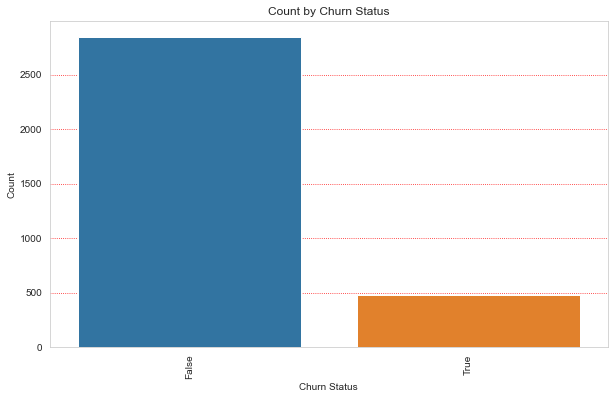

In [68]:
plot_graph(size=(10,6), type='countplot', title='Count by Churn Status', xlabel='Churn Status', ylabel='Count', data=SyriaTel_df, column='churn', hue=None)

In [69]:
#Get % of the customers who have churned
# churned_cust = len(SyriaTel_df.loc[SyriaTel_df['churn'] == True])
churned_cust = len(SyriaTel_df[SyriaTel_df['churn'] == True])
nonchurned_cust = len(SyriaTel_df[SyriaTel_df['churn'] == False])

# Calculate percentage of customers who have and have not churned
churned_cust_perc = (churned_cust/len(SyriaTel_df))*100
nonchurned_cust_perc = (nonchurned_cust/len(SyriaTel_df))*100

print(f"Churned:", churned_cust_perc)
print(f"\nNon-Churned:", nonchurned_cust_perc)

Churned: 14.491449144914492

Non-Churned: 85.5085508550855


The customers who have churned are less than the ones who haven't thus about $14.5$% of the customers have churned remaining with $85.5$%.

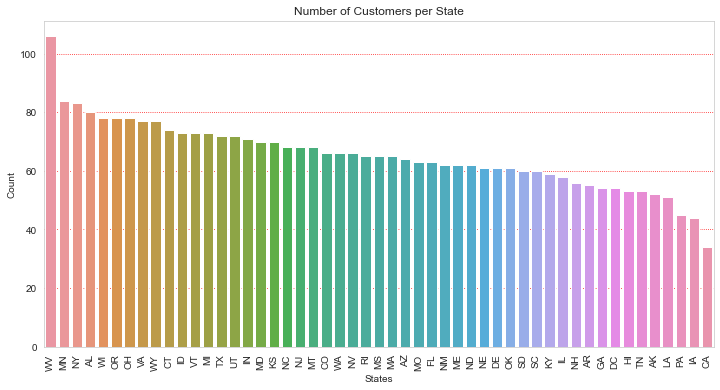

In [70]:
#Plot a graph for the state
plot_graph(size=(12,6), type="countplot", title="Number of Customers per State", 
           xlabel="States", ylabel="Count", data=SyriaTel_df, column="state", hue=None)



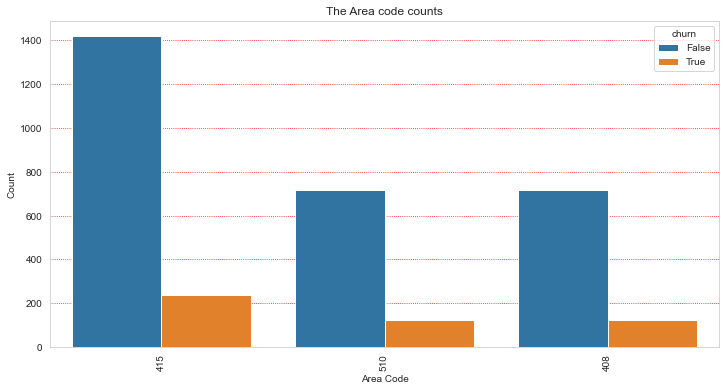

In [71]:
# Plot area code
plot_graph(size=(12,6), type="countplot", title="The Area code counts", xlabel="Area Code", ylabel="Count", 
           data=SyriaTel_df, column="area code", hue="churn")

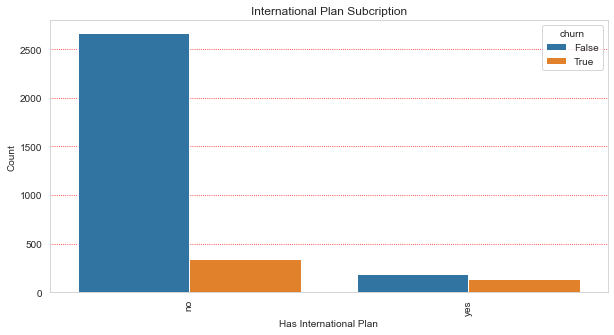

In [72]:
# Plot international plan
plot_graph(size=(10,5), type="countplot", title="International Plan Subcription", xlabel="Has International Plan",
            ylabel="Count", data=SyriaTel_df, column="international plan", hue="churn")


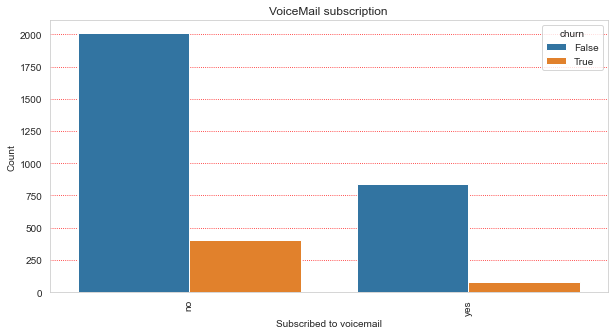

In [73]:
# Plot voicemail plan
plot_graph(size=(10,5), type="countplot", title="VoiceMail subscription", xlabel="Subscribed to voicemail", 
           ylabel="Count", data=SyriaTel_df, column="voice mail plan", hue="churn")

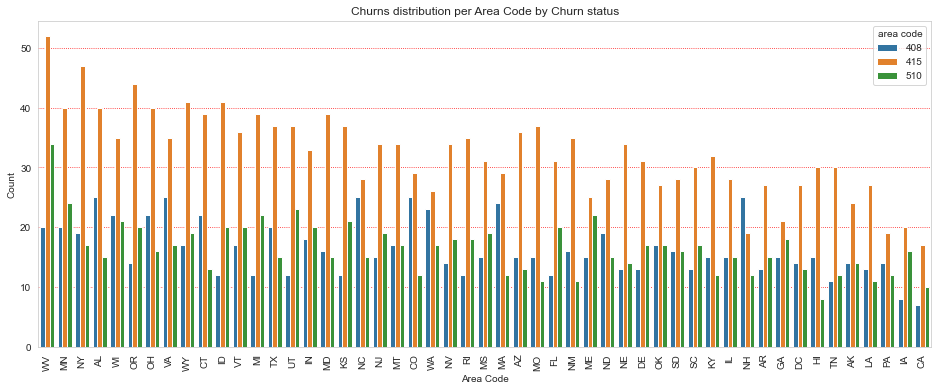

In [74]:
# Plot the graph using the plot_graph function
plot_graph(size=(16,6), type="countplot", title="Churns distribution per Area Code by Churn status", xlabel="Area Code", 
           ylabel="Count", data=SyriaTel_df, column="state", hue='area code')

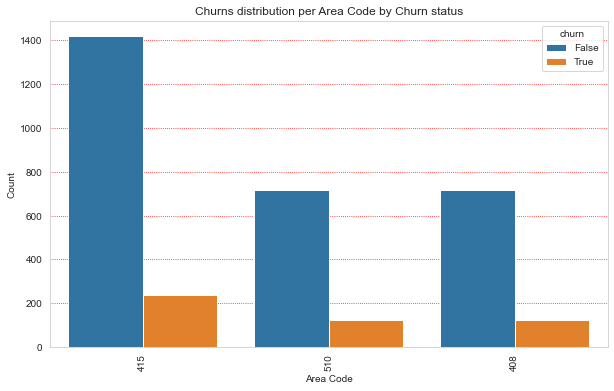

In [75]:
plot_graph(size=(10,6), type="countplot", data=SyriaTel_df, 
            title="Churns distribution per Area Code by Churn status", 
            xlabel="Area Code", ylabel="Count", column="area code", hue="churn")

In [76]:
# % of customers who have churned per area code

# Get number of customers who have and not churned in area 415
churned_cust_area415 = len(SyriaTel_df[(SyriaTel_df['area code'] == 415) & (SyriaTel_df['churn'] == True)])
nonchurned_cust_area415 = len(SyriaTel_df[(SyriaTel_df['area code'] == 415) & (SyriaTel_df['churn'] == False)])

# Calculate percentage of customers who have and have not churned per area code
churned_cust_area415_perc = (churned_cust_area415/len(SyriaTel_df['area code']))*100 
nonchurned_cust_area415_perc = (nonchurned_cust_area415/len(SyriaTel_df['area code']))*100

# Calculate percentage of customers who have and have not churned as per area code 415
nonchurned_cust_area415_PerArea_perc = (nonchurned_cust_area415/len(SyriaTel_df[(SyriaTel_df['area code'] == 415)]))*100 #8 85.74%

# Get number of customers who have and not churned in area 510
churned_cust_area510 = len(SyriaTel_df[(SyriaTel_df['area code'] == 510) & (SyriaTel_df['churn'] == True)])
nonchurned_cust_area510 = len(SyriaTel_df[(SyriaTel_df['area code'] == 510) & (SyriaTel_df['churn'] == False)])

# Calculate percentage of customers who have and have not churned per area code
churned_cust_area510_perc = (churned_cust_area510/len(SyriaTel_df['area code']))*100
nonchurned_cust_area510_perc = (nonchurned_cust_area510/len(SyriaTel_df['area code']))*100

# Calculate percentage of customers who have and have not churned as per area code 510
nonchurned_cust_area510_PerArea_perc = (nonchurned_cust_area510/len(SyriaTel_df[(SyriaTel_df['area code'] == 510)]))*100 #85.11%

# Get number of customers who have and not churned in area 408
churned_cust_area408 = len(SyriaTel_df[(SyriaTel_df['area code'] == 408) & (SyriaTel_df['churn'] == True)])
nonchurned_cust_area408 = len(SyriaTel_df[(SyriaTel_df['area code'] == 408) & (SyriaTel_df['churn'] == False)])

# Calculate percentage of customers who have and have not churned per area code
churned_cust_area408_perc = (churned_cust_area408/len(SyriaTel_df['area code']))*100
nonchurned_cust_area408_perc = (nonchurned_cust_area408/len(SyriaTel_df['area code']))*100

# Calculate percentage of customers who have and have not churned as per area code 408
nonchurned_cust_area408_PerArea_perc = (nonchurned_cust_area408/len(SyriaTel_df[(SyriaTel_df['area code'] == 408)]))*100 #85.44%


print(f"Churned percentage for Area 415:", churned_cust_area415_perc)
print(f"Non-Churned for Area 415:", nonchurned_cust_area415_perc)
print(f"Non-Churned as Per Area - Area 415:", nonchurned_cust_area415_PerArea_perc)

print(f"\nChurned percentage for Area 510:", churned_cust_area510_perc)
print(f"Non-Churned for Area 510:", nonchurned_cust_area510_perc)
print(f"Non-Churned as Per Area - Area 510:", nonchurned_cust_area510_PerArea_perc)

print(f"\nChurned percentage for Area 408:", churned_cust_area408_perc)
print(f"Non-Churned for Area 408:", nonchurned_cust_area408_perc)
print(f"Non-Churned as Per Area - Area 408:", nonchurned_cust_area408_PerArea_perc)

Churned percentage for Area 415: 7.080708070807081
Non-Churned for Area 415: 42.57425742574257
Non-Churned as Per Area - Area 415: 85.74018126888218

Churned percentage for Area 510: 3.7503750375037503
Non-Churned for Area 510: 21.45214521452145
Non-Churned as Per Area - Area 510: 85.11904761904762

Churned percentage for Area 408: 3.6603660366036608
Non-Churned for Area 408: 21.482148214821482
Non-Churned as Per Area - Area 408: 85.44152744630071


Finding:
1. From the graph above, each state had all the 3 area code.
2. Area 415 has the highest number of customers and the highest number of customers who have churned
3. Averagely, about $85$% of the customers have not churned

Let us check the churn status per state

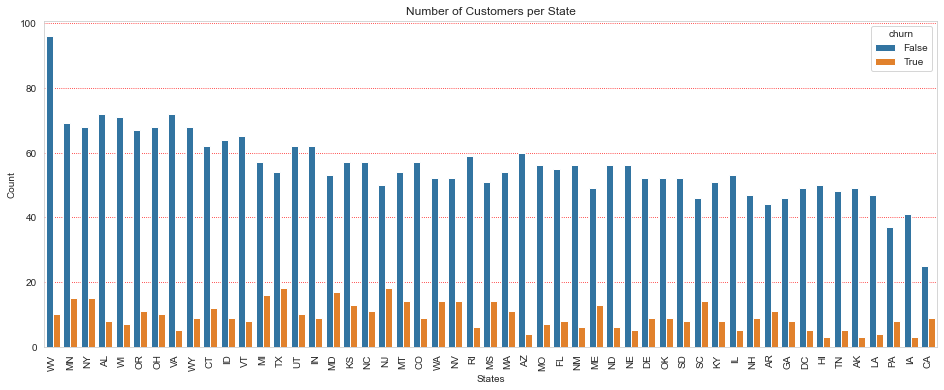

In [77]:
# Create a graph of Churn per state using the plot_graph function
plot_graph(size=(16,6), type="countplot", title="Number of Customers per State", 
           xlabel="States", ylabel="Count", data=SyriaTel_df, column="state", hue="churn")

Findings:

1. The customers who want to churn are less in number as opposed to those who don't want to churn
2. The TX and NJ states have the highest churn
3. The WV state has the highest number of customers who don't want to churn

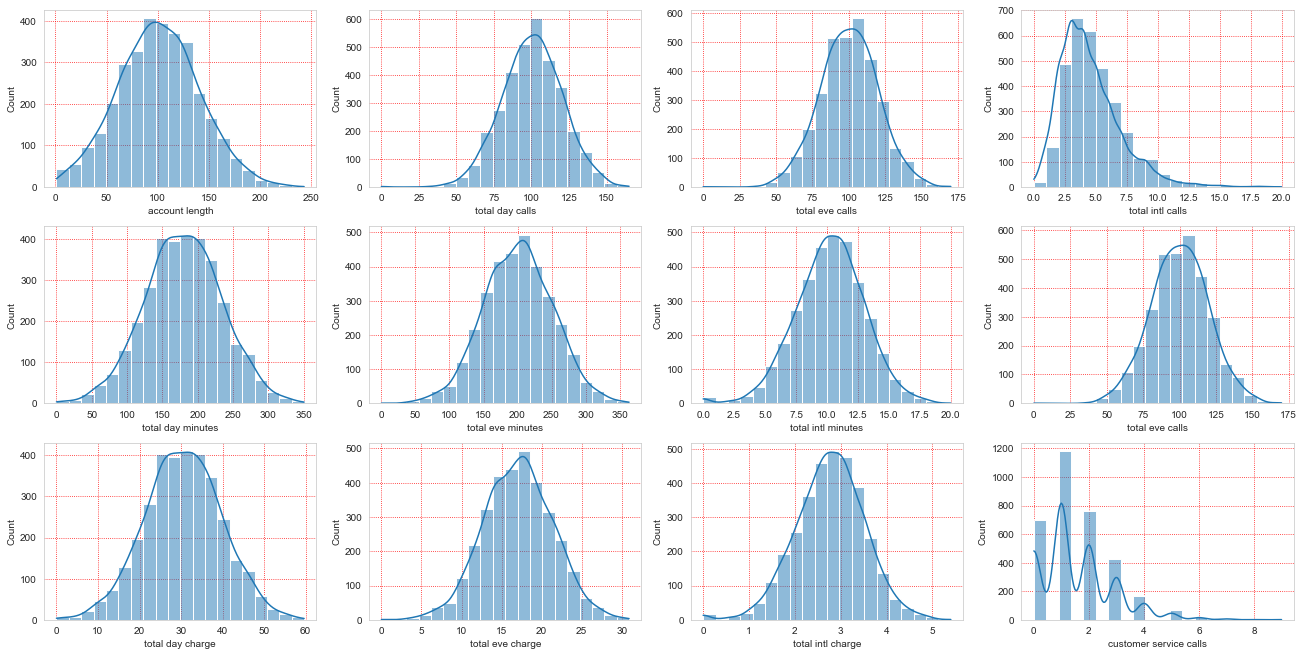

In [78]:
# Create a varible with a list of the numerical columns
numerical_df = SyriaTel_df[["account length", "number vmail messages", "total day minutes", "total day calls", 
                   "total day charge", "total eve minutes","total eve calls","total eve charge", 
                   "total night minutes", "total night calls","total night charge", "total intl minutes", "total intl calls",
                     "total intl charge", "customer service calls", "churn"]]

# Initialize a figure and axes of the graph containing 3 rows and 4 columns for 12 graph as subplots
fig, axes = plt.subplots(3,4, figsize=(18,9), constrained_layout = True)# sharey=True,

# Plt histograms for specific columns to check their shapes
sns.histplot(numerical_df['account length'], bins=20, ax=axes[0,0], kde=True)
sns.histplot(numerical_df["total day calls"], bins=20, ax=axes[0,1], kde=True)
sns.histplot(numerical_df["total eve calls"], bins=20, ax=axes[0,2], kde=True)
sns.histplot(numerical_df["total intl calls"], bins=20, ax=axes[0,3], kde=True)#
sns.histplot(numerical_df["total day minutes"], bins=20, ax=axes[1,0], kde=True)
sns.histplot(numerical_df["total eve minutes"], bins=20, ax=axes[1,1], kde=True)
sns.histplot(numerical_df["total intl minutes"], bins=20, ax=axes[1,2], kde=True)
sns.histplot(numerical_df["total eve calls"], bins=20, ax=axes[1,3], kde=True)
sns.histplot(numerical_df["total day charge"], bins=20, ax=axes[2,0], kde=True)
sns.histplot(numerical_df["total eve charge"], bins=20, ax=axes[2,1], kde=True)
sns.histplot(numerical_df["total intl charge"], bins=20, ax=axes[2,2], kde=True)
# sns.histplot(numerical_df["number vmail messages"], bins=20, ax=axes[2,3])
sns.histplot(numerical_df["customer service calls"], bins=20, ax=axes[2,3], kde=True)
plt.show()

Findings:
1. All the numerical values are normally distributed apart from the '*customer service calls*' which has several peaks. This may be because the '*customer service calls*' are ordinal numbers, not continuos.
2. The '*total intl calls*' is skewed to the left but it is normally distributed

Let us have a pairplot for numerical features to check the relationships

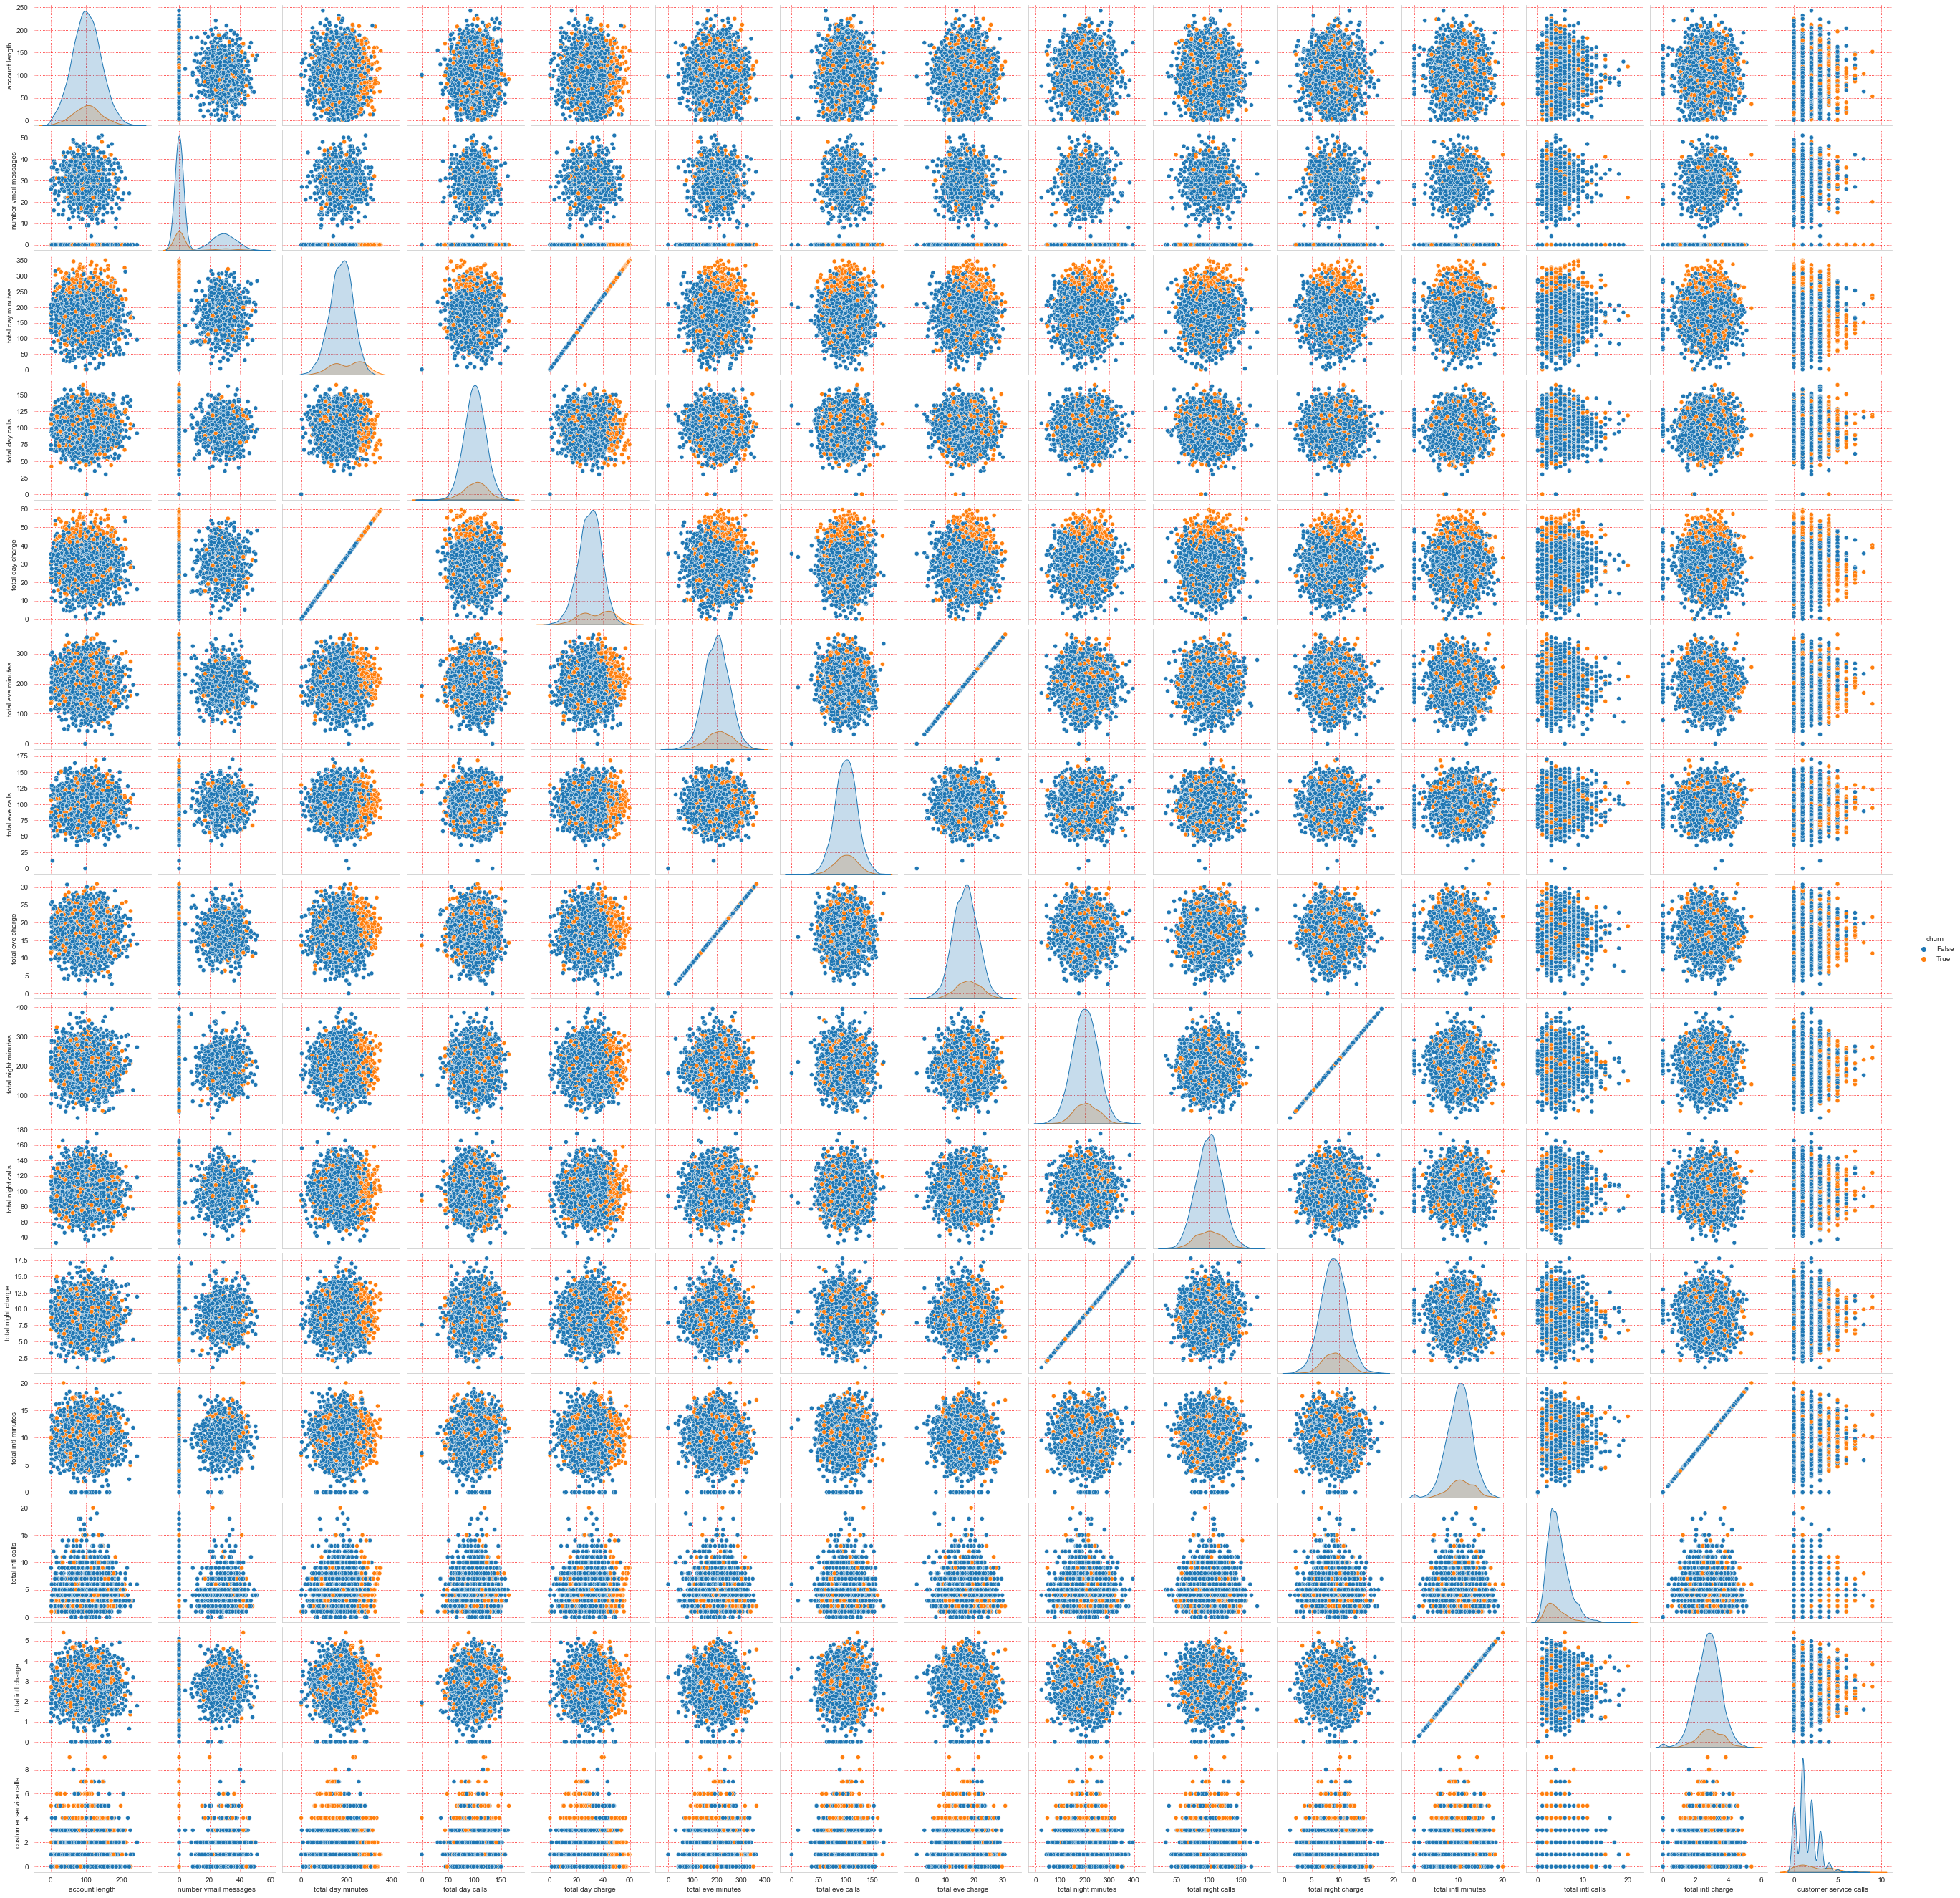

In [79]:
# A pairplot to show the relationship

# Create a pairplot using seaborn
sns.pairplot(numerical_df, hue="churn", height=2.5)
plt.show()

From the pairplot, Some have a perfect linear relationships such as the 'minutes' and 'charge' whether for day, evening or night. Most of the features are related but not having a linear relationships. 

**Correlation Heatmap for Numeric Features**

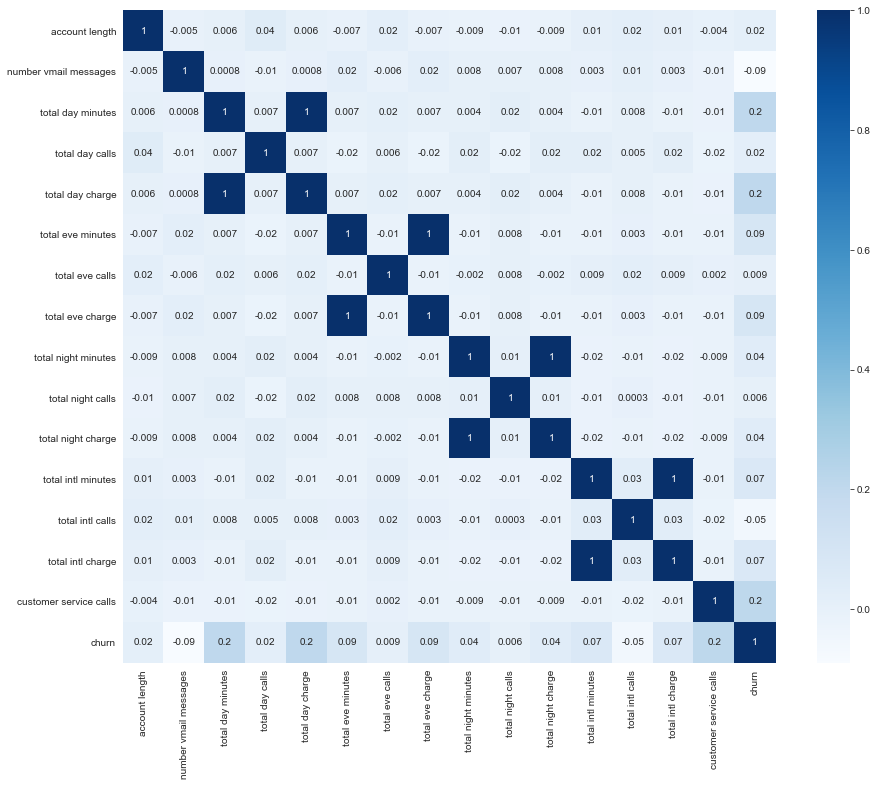

In [80]:
# Calculate correlation for all the numerical variables
corr_mat = numerical_df.corr()

# Create a plot of size 12 by 8
plt.subplots(figsize=(15,12))

# Create a heatmap using seaborn
sns.heatmap(corr_mat, annot=True, cmap='Blues', square=True, fmt='.0g', linecolor="blue")

# Make the X and Y labels to rotate 90 and 0 degrees respectively
plt.xticks(rotation=90)
plt.yticks(rotation=0)

# Show the plot
plt.show()

**Observations**

Majority of the features are not correlated but there others with perfect correlations:
1. 'total day minutes' vs 'total day charge' 
2. 'total eve minutes' vs 'total eve charge' 
3. 'total night minutes' vs 'total night charge' 
4. 'total intl minutes' vs 'total intl charge' 

A high correlation may lead to multicolinearity which may complicate regression analysis. This will make it difficult to determine the individual effects of each independent variable on the dependent varaible. So we will drop them.

In [81]:
# Create a variable containing columns to drop
columns_to_drop = ['total day minutes', 'total eve minutes', 'total night minutes', 'total intl minutes']

# Create a new Dataframe without the dropped columns
SyriaTel_df_new = SyriaTel_df.drop(columns=columns_to_drop)
SyriaTel_df_new.head(2)

state  account length  area code international plan voice mail plan  \
0    KS             128        415                 no             yes   
1    OH             107        415                 no             yes   

   number vmail messages  total day calls  total day charge  total eve calls  \
0                     25              110             45.07               99   
1                     26              123             27.47              103   

   total eve charge  total night calls  total night charge  total intl calls  \
0             16.78                 91               11.01                 3   
1             16.62                103               11.45                 3   

   total intl charge  customer service calls  churn  
0                2.7                       1  False  
1                3.7                       1  False

In [82]:
# print("The original dataframe has {} columns.".format(SyriaTel_df.shape[1]))
# # Calculate the correlation matrix and take the absolute value
# corr_matrix = SyriaTel_df.corr().abs()
# # corr_matrix

# # Create a True/False mask and apply it
# mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
# mask
# tri_df = corr_matrix.mask(mask)
# tri_df

# # List column names of highly correlated features (r > 0.90)
# to_drop = [c for c in tri_df.columns if any(tri_df[c] >  0.90)]
# to_drop

# # reduced_df = SyriaTel_df.drop(to_drop, axis=1) # Drop the features
# # print("The reduced dataframe has {} columns.".format(reduced_df.shape[1]))

In [83]:
# 

Since we will be using numerical data in the analysis, we will transform our target column $churn$ to a numerical dtype i.e. make True & False to $0s$ and $1s$

In [84]:
# Select the churn column  and assign it to a varible
churn = SyriaTel_df_new["churn"] #churn_numerical

# Check the top 5 rows and unique value counts to see if they are True and False
churn.head()
churn.value_counts()

# Create an empty list
churn_new=[]

# Loop over the column and replace with 0s and 1s
for i in range(len(churn)):
    if churn[i] == True:
        # append 1 if churn value is True
        churn_new.append(1)
    else:
        # Append 0 if churn value is False
        churn_new.append(0) 

# Change churn values to the new values from the created list
SyriaTel_df_new["churn"] = churn_new

# Check the data type for edited churn
SyriaTel_df_new["churn"].dtype

dtype('int64')

In [85]:
SyriaTel_df_new.head(2)

state  account length  area code international plan voice mail plan  \
0    KS             128        415                 no             yes   
1    OH             107        415                 no             yes   

   number vmail messages  total day calls  total day charge  total eve calls  \
0                     25              110             45.07               99   
1                     26              123             27.47              103   

   total eve charge  total night calls  total night charge  total intl calls  \
0             16.78                 91               11.01                 3   
1             16.62                103               11.45                 3   

   total intl charge  customer service calls  churn  
0                2.7                       1      0  
1                3.7                       1      0

## Transformation

Now, let us transform the categorical values to $0s$ and #1s$ so as to enable analysis

In [87]:
# Use the get_dimmies method to encode the categorical data

# Encode the 'state' column
state_dummy_df = pd.get_dummies(SyriaTel_df_new["state"], dtype=np.int64, prefix="state_",)
# state_dummy_df

# Encode the 'area code' column
area_code_dummy_df = pd.get_dummies(SyriaTel_df_new["area code"],dtype=np.int64, prefix="area_code_is")

# Encode the 'international plan' column
international_plan_dummy_df = pd.get_dummies(SyriaTel_df_new["international plan"],dtype=np.int64,
                                             drop_first = True, prefix="international_plan_",)
# Encode the 'voice mail plan' column
voice_mail_plan_dummy_df = pd.get_dummies(SyriaTel_df_new["voice mail plan"], dtype=np.int64, 
                                          drop_first = True, prefix="voice_mail_plan_is")

# Join the new encoded columns together
SyriaTel_df_new = pd.concat([SyriaTel_df_new, state_dummy_df, area_code_dummy_df, international_plan_dummy_df,
                             voice_mail_plan_dummy_df], axis=1)
# Exclude duplicates
SyriaTel_df_new = SyriaTel_df_new.loc[:,~SyriaTel_df_new.columns.duplicated()]

# Drop old columns that have been encoded
SyriaTel_df_new = SyriaTel_df_new.drop(['state','area code','international plan','voice mail plan'],axis=1)

# Check the top 5 rows
SyriaTel_df_new.head()

account length  number vmail messages  total day calls  total day charge  \
0             128                     25              110             45.07   
1             107                     26              123             27.47   
2             137                      0              114             41.38   
3              84                      0               71             50.90   
4              75                      0              113             28.34   

   total eve calls  total eve charge  total night calls  total night charge  \
0               99             16.78                 91               11.01   
1              103             16.62                103               11.45   
2              110             10.30                104                7.32   
3               88              5.26                 89                8.86   
4              122             12.61                121                8.41   

   total intl calls  total intl charge  ...  state__VT  state__WA  state__WI  \
0                 3               2.70  ...          0          0          0   
1                 3               3.70  ...          0          0          0   
2                 5               3.29  ...          0          0          0   
3                 7               1.78  ...          0          0          0   
4                 3               2.73  ...          0          0          0   

   state__WV  state__WY  area_code_is_408  area_code_is_415  area_code_is_510  \
0          0          0                 0                 1                 0   
1          0          0                 0                 1                 0   
2          0          0                 0                 1                 0   
3          0          0                 1                 0                 0   
4          0          0                 0                 1                 0   

   international_plan__yes  voice_mail_plan_is_yes  
0                        0                       1  
1                        0                       1  
2                        0                       0  
3                        1                       0  
4                        1                       0  

[5 rows x 68 columns]

### Train test split

In [88]:
# Split the data to train and test data

# Define the target and predictor columns
y = SyriaTel_df_new["churn"]
X = SyriaTel_df_new.drop(columns="churn", axis=1)

# Check top 5 rows to confirm
X.head()

# Split the data
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [89]:
X_train

account length  number vmail messages  total day calls  \
367               45                      0              127   
3103             115                      0              111   
549              121                     31               63   
2531             180                      0              134   
2378             112                      0              122   
...              ...                    ...              ...   
1095             106                      0              120   
1130             122                      0               62   
1294              66                      0               76   
860              169                      0              111   
3174              36                     43              123   

      total day charge  total eve calls  total eve charge  total night calls  \
367              13.29              108             21.54                100   
3103             33.30              108             19.30                113   
549              40.31              117             17.48                 85   
2531             24.36              113             15.34                 87   
2378             35.05               94             13.98                101   
...                ...              ...               ...                ...   
1095             46.65               82             16.88                 62   
1130              5.97               89             15.37                 58   
1294             14.89              111             22.27                125   
860              30.46              130             14.89                 92   
3174              5.08              117             10.97                105   

      total night charge  total intl calls  total intl charge  ...  state__VT  \
367                11.48                 3               4.86  ...          0   
3103               14.09                 1               3.56  ...          0   
549                 8.85                 5               2.73  ...          0   
2531                8.29                 4               2.73  ...          0   
2378                6.31                 7               3.40  ...          0   
...                  ...               ...                ...  ...        ...   
1095                7.24                 3               1.62  ...          0   
1130               11.32                 2               3.43  ...          0   
1294                8.31                 5               2.48  ...          0   
860                10.29                 6               2.67  ...          0   
3174               14.67                 6               2.32  ...          0   

      state__WA  state__WI  state__WV  state__WY  area_code_is_408  \
367           0          0          0          0                 0   
3103          0          0          0          0                 0   
549           0          0          0          0                 1   
2531          0          0          0          0                 0   
2378          0          0          0          0                 0   
...         ...        ...        ...        ...               ...   
1095          0          0          0          0                 0   
1130          0          0          0          0                 0   
1294          0          0          0          0                 1   
860           0          0          0          0                 0   
3174          0          0          0          0                 1   

      area_code_is_415  area_code_is_510  international_plan__yes  \
367                  1                 0                        0   
3103                 1                 0                        0   
549                  0                 0                        0   
2531                 1                 0                        0   
2378                 0                 1                        0   
...                ...               ...        

### Data Normalization/Scaling

All the values above are now numerical but we have 'small' values and 'large' values. To have starndard data for use, we normalize the values to be within the same range.

Therefore we will use a Standard Scaler

In [94]:
# Declare the standard scale function
scaler = MinMaxScaler()

# Fit and transform all the columns and put in a dataframe
X_train_scaled = pd.DataFrame(scaler.fit_transform(X_train), index=X_train.index, columns=X_train.columns)

# Check the top 5 rows
X_train_scaled


account length  number vmail messages  total day calls  \
367         0.190476               0.000000         0.718519   
3103        0.493506               0.000000         0.600000   
549         0.519481               0.607843         0.244444   
2531        0.774892               0.000000         0.770370   
2378        0.480519               0.000000         0.681481   
...              ...                    ...              ...   
1095        0.454545               0.000000         0.666667   
1130        0.523810               0.000000         0.237037   
1294        0.281385               0.000000         0.340741   
860         0.727273               0.000000         0.600000   
3174        0.151515               0.843137         0.688889   

      total day charge  total eve calls  total eve charge  total night calls  \
367           0.217061         0.635294          0.696862           0.471831   
3103          0.555068         0.635294          0.624393           0.563380   
549           0.673480         0.688235          0.565513           0.366197   
2531          0.404054         0.664706          0.496280           0.380282   
2378          0.584628         0.552941          0.452281           0.478873   
...                ...              ...               ...                ...   
1095          0.780574         0.482353          0.546102           0.204225   
1130          0.093412         0.523529          0.497250           0.176056   
1294          0.244088         0.652941          0.720479           0.647887   
860           0.507095         0.764706          0.481721           0.415493   
3174          0.078378         0.688235          0.354901           0.507042   

      total night charge  total intl calls  total intl charge  ...  state__VT  \
367             0.624029          0.166667           0.900000  ...        0.0   
3103            0.780036          0.055556           0.659259  ...        0.0   
549             0.466826          0.277778           0.505556  ...        0.0   
2531            0.433353          0.222222           0.505556  ...        0.0   
2378            0.315003          0.388889           0.629630  ...        0.0   
...                  ...               ...                ...  ...        ...   
1095            0.370592          0.166667           0.300000  ...        0.0   
1130            0.614465          0.111111           0.635185  ...        0.0   
1294            0.434549          0.277778           0.459259  ...        0.0   
860             0.552899          0.333333           0.494444  ...        0.0   
3174            0.814704          0.333333           0.429630  ...        0.0   

      state__WA  state__WI  state__WV  state__WY  area_code_is_408  \
367         0.0        0.0        0.0        0.0               0.0   
3103        0.0        0.0        0.0        0.0               0.0   
549         0.0        0.0        0.0        0.0               1.0   
2531        0.0        0.0        0.0        0.0               0.0   
2378        0.0        0.0        0.0        0.0               0.0   
...         ...        ...        ...        ...               ...   
1095        0.0        0.0        0.0        0.0               0.0   
1130        0.0        0.0        0.0        0.0               0.0   
1294        0.0        0.0        0.0        0.0               1.0   
860         0.0        0.0        0.0        0.0               0.0   
3174        0.0        0.0        0.0        0.0               1.0   

      area_code_is_415  area_code_is_510  international_plan__yes  \
367                1.0               0.0                      0.0   
3103               1.0               0.0                      0.0   
549                0.0               0.0                      0.0   
2531               1.0               0.0                      0.0   
2378               0.0               1.0                      0.0   
...                ...               ...        

In [ ]:
X_train_full = pd.concat([X_train_scaled, X_train_ohe], axis=1)
X_train_full

Apply SMOTE to balance the distribution

In [95]:
sm = SMOTE(k_neighbors=5, random_state=42)
X_train_sample, y_train_sample = sm.fit_resample(X_train, y_train)
print('Before OverSampling, the shape of X_train: {}'.format(X_train.shape))
print('Before OverSampling, the shape of y_train: {}'.format(y_train.shape)) 
print('After OverSampling, the shape of X_train_over: {}'.format(X_train_sample.shape))
print('After OverSampling, the shape of y_train_over: {}'.format(y_train_sample.shape))

Before OverSampling, the shape of X_train: (2499, 67)
Before OverSampling, the shape of y_train: (2499,)
After OverSampling, the shape of X_train_over: (4282, 67)
After OverSampling, the shape of y_train_over: (4282,)


## Modeling

* Linear Regression as the base model

* Decision Trees Regression

* Random Forest Regression

Will use Confusion matrix to...

The Scores to check are:
* Accuracy score , acc
* F1-Score
* Recall
* Precision

In [96]:
# # Object creation, fitting the data & predict the test values
# lr= LogisticRegression()
# lr.fit(X_train_sample,y_train_sample) 
# y_pred_lr = lr.predict(X_test) 

Model Comparison

Hyperparameter tuning???

## Conclusion